In [168]:
from yahoo_fin.stock_info import get_data
from datetime import date
import plotly.express as px
import pandas as pd
import numpy as np
from pathlib import Path
import csv
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
%matplotlib inline


today = date.today()
spy = get_data("spy", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
xle = get_data("xle", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
gold = get_data("GLD", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
tlt = get_data("tlt", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
usd = get_data("tlt", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")

In [2]:
# @TODO: Set file paths for btc_data.csv and eth_data.csv
btc_filepath = Path('Resources/BTC-USD.csv')
btc_df = pd.read_csv(btc_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

btc_df.head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

                Volume  
Date                    
2014-09-17  21056800.0  
2014-09-18  34483200.0  
2014-09-19  37919700.0  
2014-09-20  36863600.0  
2014-09-21  26580100.0

In [3]:
btc_df.sort_index(inplace=True)
btc_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

                Volume  
Date                    
2014-09-17  21056800.0  
2014-09-18  34483200.0  
2014-09-19  37919700.0  
2014-09-20  36863600.0  
2014-09-21  26580100.0

In [4]:
eth_filepath = Path('Resources/ETH-USD.csv')
eth_df = pd.read_csv(eth_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

eth_df.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2015-08-07  2.831620  3.536610  2.521120  2.772120   2.772120   164329.0
2015-08-08  2.793760  2.798810  0.714725  0.753325   0.753325   674188.0
2015-08-09  0.706136  0.879810  0.629191  0.701897   0.701897   532170.0
2015-08-10  0.713989  0.729854  0.636546  0.708448   0.708448   405283.0
2015-08-11  0.708087  1.131410  0.663235  1.067860   1.067860  1463100.0

In [5]:
#fig = px.line(spy['close'], labels={ 'close' : 'SPY CLOSE'})
#fig.show()

In [6]:
#gold.head()

In [7]:
#dxy = get_data("dxy", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
#dxy['close'].plot(figsize=(20,10))

In [184]:
column = ['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT']

combined_df = pd.concat([btc_df['Close'], eth_df['Close'], spy['close'], xle['close'], gold['close'], tlt['close']], axis="columns", join="inner")
midx = pd.MultiIndex(levels=[column, ['Close']])
combined_df.columns = midx
combined_df.head()

TypeError: Must pass both levels and codes

In [9]:
combined_df.isnull().sum()

BTC    5
ETH    5
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [10]:
portfolio_returns  = combined_df.dropna()

In [11]:
portfolio_returns.isnull().sum()

BTC    0
ETH    0
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [12]:
portfolio_returns = portfolio_returns.pct_change()

In [13]:
portfolio_returns  = portfolio_returns.dropna()

In [185]:
fig = px.line(portfolio_returns)
fig.update_layout(
    title='Volatility',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)
fig.show()

In [62]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
fig = px.line(cumulative_returns)
fig.update_layout(
    title='Volatility',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)
fig.show()

In [60]:
fig = go.Figure()
fig.add_trace(go.Box(y=portfolio_returns['BTC'], name='BTC',
                marker_color = 'indianred', boxpoints=False))
fig.add_trace(go.Box(y=portfolio_returns['ETH'], name = 'ETH',
                marker_color = 'lightseagreen', boxpoints=False))
fig.add_trace(go.Box(y=portfolio_returns['SPY'], name='SPY',
                marker_color = 'blue', boxpoints=False))
fig.add_trace(go.Box(y=portfolio_returns['XLE'], name = 'XLE',
                marker_color = 'yellow', boxpoints=False))
fig.add_trace(go.Box(y=portfolio_returns['GLD'], name='GLD',
                marker_color = 'purple', boxpoints=False))
fig.add_trace(go.Box(y=portfolio_returns['TLT'], name = 'TLT',
                marker_color = 'orange', boxpoints=False))

fig.update_layout(
    title='Volatility',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

In [64]:
volatility = portfolio_returns.std()
volatility

BTC    0.046724
ETH    0.081419
SPY    0.011801
XLE    0.020487
GLD    0.008831
TLT    0.008719
dtype: float64

In [65]:
volatility = portfolio_returns.std() * np.sqrt(252)
volatility

BTC    0.741721
ETH    1.292482
SPY    0.187340
XLE    0.325214
GLD    0.140186
TLT    0.138411
dtype: float64

In [66]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll = portfolio_returns.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_returns.rolling(window=21).std().plot(figsize=(20,6))

<AxesSubplot:>

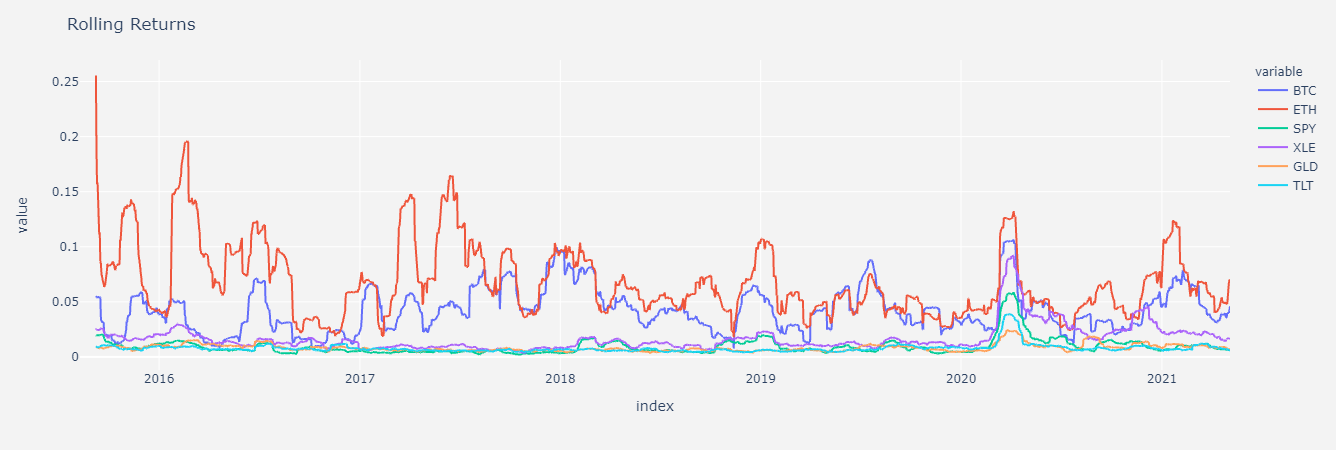

In [73]:
fig = px.line(roll)
fig.update_layout(
    title='Rolling Returns',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)
fig.show()

In [74]:
# Calculate the correlation
price_correlation = portfolio_returns.corr()
# Display de correlation matrix
price_correlation

BTC       ETH       SPY       XLE       GLD       TLT
BTC  1.000000  0.478717  0.142542  0.118354  0.104796 -0.029885
ETH  0.478717  1.000000  0.111941  0.082284  0.084387 -0.006073
SPY  0.142542  0.111941  1.000000  0.718332 -0.007816 -0.394084
XLE  0.118354  0.082284  0.718332  1.000000 -0.015398 -0.342205
GLD  0.104796  0.084387 -0.007816 -0.015398  1.000000  0.325467
TLT -0.029885 -0.006073 -0.394084 -0.342205  0.325467  1.000000

In [85]:
# Use `ewm` to calculate the rolling window
ewm_calc = portfolio_returns.ewm(halflife=21).mean().head()

<AxesSubplot:>

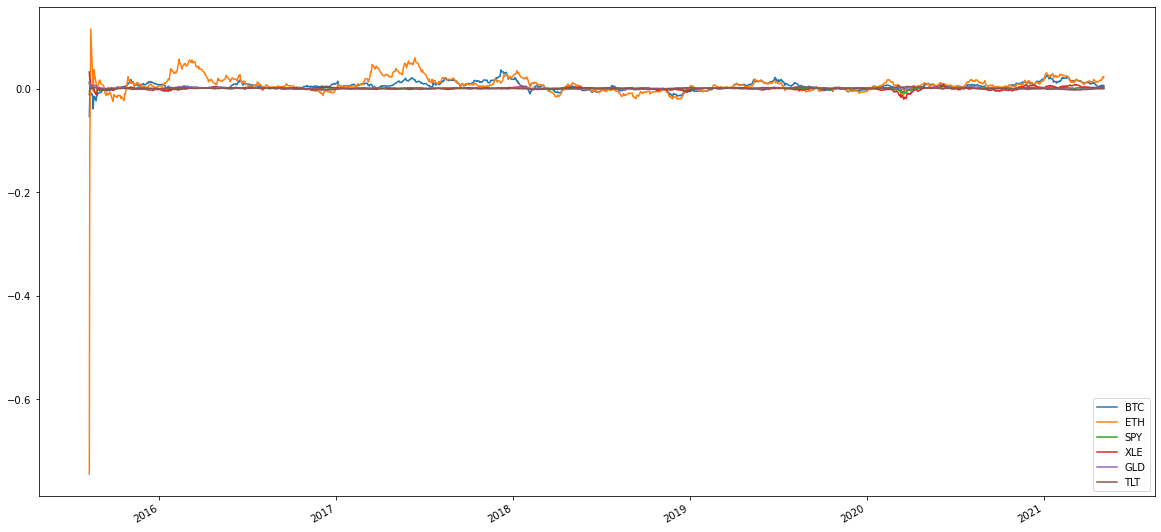

In [83]:
portfolio_returns.ewm(halflife=21).mean().plot(figsize=(20, 10))

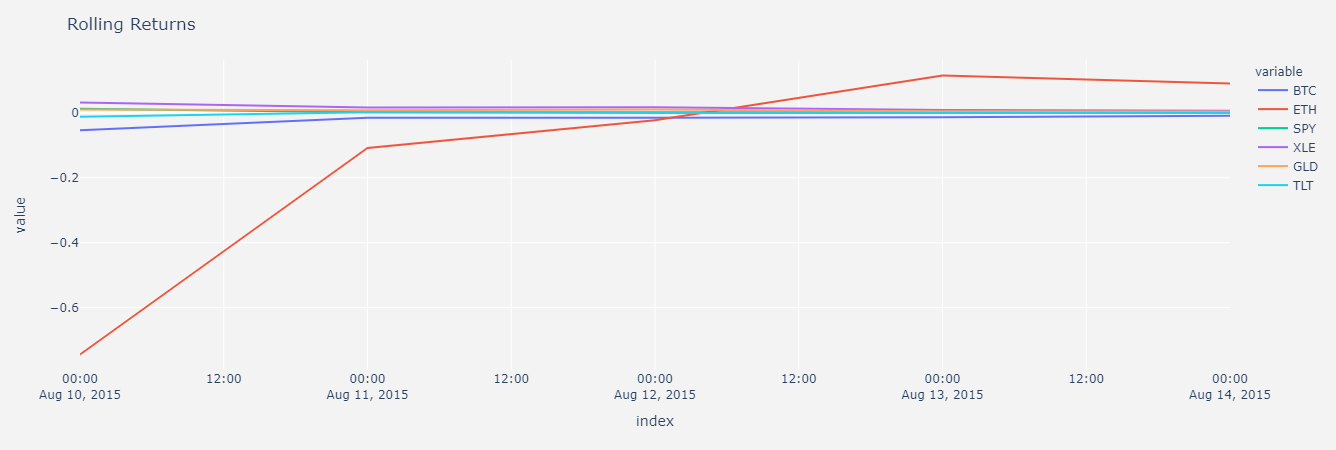

In [89]:
fig = px.line(ewm_calc)
fig.update_layout(
    title='Rolling Returns',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)
fig.show()

In [121]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios[BTC]


1.6305641356572447

In [78]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',figsize=(20,6))

<AxesSubplot:>

In [180]:
fig = px.bar(sharpe_ratios,labels=dict(x="Assets", y="Sharpe Ratio", color="Sharpe Ratio"),color = sharpe_ratios, color_continuous_scale='Bluered_r')
fig.update_layout(
    title='Sharpe Ratios',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)
fig.show()

In [79]:
# Calculate and plot the correlation
price_correlation_new = portfolio_returns.corr()
# Display de correlation matrix
price_correlation_new

BTC       ETH       SPY       XLE       GLD       TLT
BTC  1.000000  0.478717  0.142542  0.118354  0.104796 -0.029885
ETH  0.478717  1.000000  0.111941  0.082284  0.084387 -0.006073
SPY  0.142542  0.111941  1.000000  0.718332 -0.007816 -0.394084
XLE  0.118354  0.082284  0.718332  1.000000 -0.015398 -0.342205
GLD  0.104796  0.084387 -0.007816 -0.015398  1.000000  0.325467
TLT -0.029885 -0.006073 -0.394084 -0.342205  0.325467  1.000000

In [80]:
sns.heatmap(price_correlation_new, vmin=-1, vmax=1,annot=True)

<AxesSubplot:>

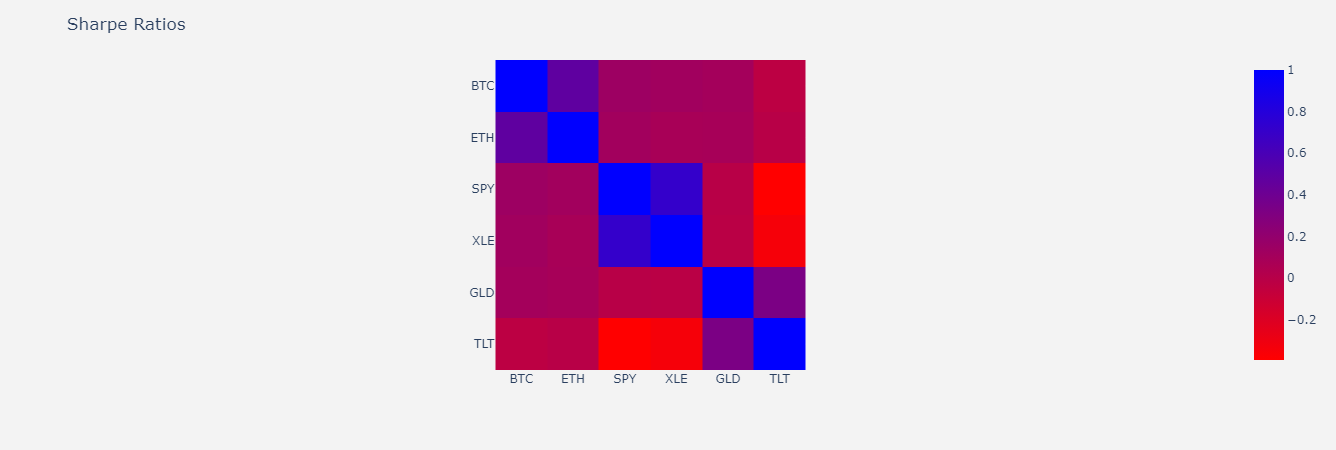

In [181]:
fig = px.imshow(price_correlation_new, color_continuous_scale='Bluered_r', )
fig.update_layout(
    title='Sharpe Ratios',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)
fig.show()

<AxesSubplot:ylabel='Frequency'>

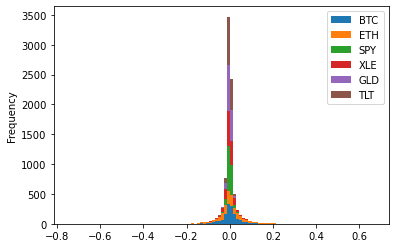

In [81]:
# Distribution Histogram

portfolio_returns.plot.hist(stacked=True, bins=100)



In [82]:
# Set weights
weights = [0,0,1/4,1/4,1/4,1/4]

# Calculate portfolio return

portfolio_returns_weight= portfolio_returns.dot(weights)
# portfolio_returns_new.set_index('Date')

portfolio_returns_weight.dropna()

# Display sample data
portfolio_returns_weight.head()

2015-08-10    0.010591
2015-08-11    0.003461
2015-08-12    0.006988
2015-08-13   -0.006973
2015-08-14    0.000934
dtype: float64